In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
rawDfLA = pd.read_csv('sar_mpgu_izh.csv', skiprows=56866, sep='\s+', skipinitialspace=True, nrows=(57062-56867), engine='python')
rawDfLA.tail()

,09:20:06,runq-sz,plist-sz,ldavg-1,ldavg-5,ldavg-15
190,12:31:06,2,1445,2.39,2.32,2.28
191,12:32:06,2,1442,2.35,2.32,2.28
192,12:33:06,2,1442,2.21,2.29,2.27
193,12:34:06,3,1442,2.12,2.25,2.25
194,12:35:06,3,1442,2.14,2.23,2.25


In [3]:
time = rawDfLA.iloc[:,0]
time = pd.to_datetime(time).apply(lambda t: t.strftime('%H:%M'))
dfLd1 = pd.DataFrame({'Time': time, 'ldavg-1': rawDfLA.iloc[:,3]})
dfLd5 = pd.DataFrame({'Time': time, 'ldavg-5': rawDfLA.iloc[:,-2]})
dfLd15 = pd.DataFrame({'Time': time, 'ldavg-15': rawDfLA.iloc[:,-1]})
dfLd15.tail()

,Time,ldavg-15
190,12:31,2.28
191,12:32,2.28
192,12:33,2.27
193,12:34,2.25
194,12:35,2.25


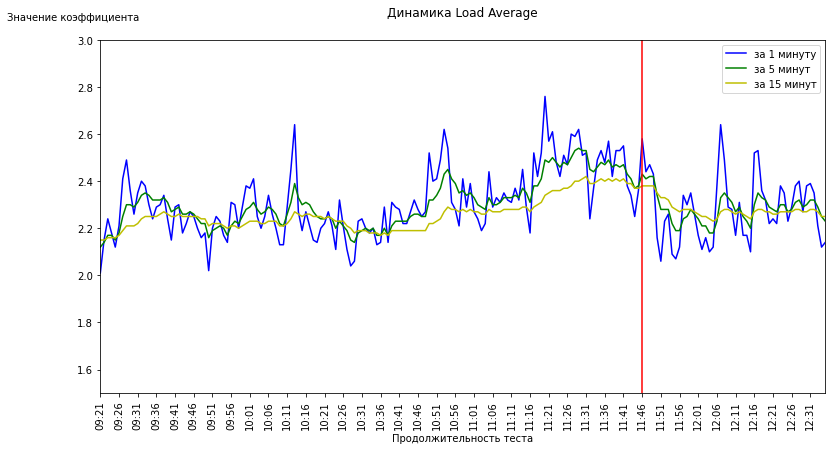

In [6]:
# График load Average
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfLd1.Time, dfLd1['ldavg-1'], 'b',label='за 1 минуту')
ax.plot(dfLd5.Time, dfLd5['ldavg-5'], 'g',label='за 5 минут')
ax.plot(dfLd15.Time, dfLd15['ldavg-15'], 'y',label='за 15 минут')
plt.axvline(x='11:46', color='r')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Значение коэффициента', rotation=0, y=1.05)
ax.set_title('Динамика Load Average', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(1.5,3)

xAxis = np.arange(0, dfLd1.index[-1],5)
plt.xlim(dfLd1['Time'][0], dfLd1['Time'][dfLd1.index[-1]])
plt.xticks(xAxis, dfLd1['Time'][xAxis], rotation='vertical')

plt.savefig('Динамика Load Average')
plt.show()
plt.close()